In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from citipy import citipy

#api key
from config import apikey



In [2]:
# Range of latitudes
lat_range = (-90, 90)


# Generate Cities List

In [3]:
#create empty list of cites
cities = []

#generate random set of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
cord = zip(lats, lngs) #zip list of latitudes and longitudes together


In [4]:
for x, d in cord:
    city = citipy.nearest_city(x, d).city_name
    if city not in cities:
        cities.append(city)


In [5]:
len(cities)

598

In [6]:
#create empty lists for data that will be pulled
long = []
lat = []
max_temp = []
humidity = []
clouds = []
wind = []
country = []
name = []
date = []

In [7]:
print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for x in cities:
    try:
        url = ('http://api.openweathermap.org/data/2.5/weather?q={0}&units=Imperial&APPID={1}').format(
        x, apikey)
        data = requests.get(url).json()
        data = requests.get(url).json()
        long1 = data['coord']['lon'] #pull the longitudes
        lat1 = data['coord']['lat'] #latitudes
        max_temp1 = data['main']['temp_max'] #pull high tempeture
        humidity1 = data['main']['humidity'] #pull humidity
        clouds1 = data['clouds']['all'] #pull cloudiness 
        wind1 = data['wind']['speed'] #pull windspeed
        country1 = data['sys']['country'] #pull country code
        name1 = data['name'] #pull city name
        date1 = time.strftime("%B %d, %Y",)
        long.append(long1) #append above data to the list created above
        lat.append(lat1)
        max_temp.append(max_temp1)
        humidity.append(humidity1)
        clouds.append(clouds1)
        wind.append(wind1)
        country.append(country1)
        name.append(name1)
        date.append(date1)
        print(f'Processing Record {len(name)} | {x}')
        time.sleep(0.95) #wait 0.95 seconds to move on; this keeps api requests within my rate limit
    except KeyError:
        print(f'{x} not found. Skipping...')
        time.sleep(0.95)


Beginning Data Retrieval
-----------------------------
Processing Record 1 | mar del plata
Processing Record 2 | mataura
Processing Record 3 | faanui
falealupo not found. Skipping...
Processing Record 4 | kaitangata
Processing Record 5 | bambous virieux
Processing Record 6 | lakes entrance
Processing Record 7 | bathsheba
Processing Record 8 | sobolevo
Processing Record 9 | hilo
palabuhanratu not found. Skipping...
Processing Record 10 | port alfred
Processing Record 11 | pangody
Processing Record 12 | busselton
Processing Record 13 | filingue
Processing Record 14 | kuybysheve
Processing Record 15 | mayo
Processing Record 16 | bredasdorp
Processing Record 17 | east london
Processing Record 18 | kapaa
Processing Record 19 | cape town
Processing Record 20 | zhezkazgan
Processing Record 21 | foligno
Processing Record 22 | adrar
Processing Record 23 | pishin
Processing Record 24 | port elizabeth
Processing Record 25 | atuona
Processing Record 26 | ushuaia
mys shmidta not found. Skipping...


Processing Record 215 | hithadhoo
Processing Record 216 | san marcos
Processing Record 217 | maumere
Processing Record 218 | khandbari
Processing Record 219 | fortuna
Processing Record 220 | innisfail
Processing Record 221 | ilebo
Processing Record 222 | meulaboh
Processing Record 223 | ichikawa
Processing Record 224 | constitucion
Processing Record 225 | miles city
Processing Record 226 | harper
Processing Record 227 | hofn
halalo not found. Skipping...
Processing Record 228 | manjeshwar
Processing Record 229 | cayenne
Processing Record 230 | menongue
Processing Record 231 | san rafael
Processing Record 232 | arraial do cabo
Processing Record 233 | kudahuvadhoo
Processing Record 234 | chuy
aflu not found. Skipping...
Processing Record 235 | buraydah
Processing Record 236 | pingliang
Processing Record 237 | karaton
Processing Record 238 | esperance
Processing Record 239 | laguna
Processing Record 240 | carmen
Processing Record 241 | helmstedt
Processing Record 242 | makokou
Processing 

Processing Record 433 | bhatkal
Processing Record 434 | labuan
Processing Record 435 | mundwa
Processing Record 436 | marsa matruh
Processing Record 437 | karratha
Processing Record 438 | tarakan
Processing Record 439 | jesus carranza
Processing Record 440 | luba
Processing Record 441 | salinas
Processing Record 442 | katsuura
Processing Record 443 | kununurra
Processing Record 444 | marienburg
Processing Record 445 | caravelas
Processing Record 446 | yatou
Processing Record 447 | brookhaven
Processing Record 448 | hargeysa
Processing Record 449 | artyom
Processing Record 450 | bandarbeyla
atlantic city not found. Skipping...
Processing Record 451 | javanrud
Processing Record 452 | oktyabrskoye
Processing Record 453 | inisa
Processing Record 454 | senges
Processing Record 455 | the valley
Processing Record 456 | viedma
tarudant not found. Skipping...
Processing Record 457 | ginda
Processing Record 458 | rorvik
Processing Record 459 | nassau
Processing Record 460 | virginia beach
kamens

In [8]:
#convert lists into a dictionary
data = {'City Name': name, 'Country': country, 'Longitude': long, 'Latitude': lat, 'Maximum Tempeture': max_temp, 'Humidity': humidity,
        'Cloudiness(%)': clouds, 'Wind Speed': wind, 'Date': date}


In [9]:
#convert results from api calls into a df
df = pd.DataFrame(data)

#set path for output file
path = 'output/CityData.csv'

df.count() # make sure data is complete



City Name            528
Country              528
Longitude            528
Latitude             528
Maximum Tempeture    528
Humidity             528
Cloudiness(%)        528
Wind Speed           528
Date                 528
dtype: int64

In [10]:
#output df into a csv file
df.to_csv(path)
df.head()

,City Name,Country,Longitude,Latitude,Maximum Tempeture,Humidity,Cloudiness(%),Wind Speed,Date
0,Mar del Plata,AR,-67.52,-46.43,54.57,32,41,21.30,"October 26, 2019"
1,Mataura,NZ,168.86,-46.19,57.99,82,100,3.00,"October 26, 2019"
2,Faanui,PF,-151.75,-16.48,80.37,66,36,8.03,"October 26, 2019"
3,Kaitangata,NZ,169.85,-46.28,52.12,89,100,5.82,"October 26, 2019"
4,Bambous Virieux,MU,57.76,-20.34,75.99,94,40,3.36,"October 26, 2019"


# Latitude vs. Temperature Plot

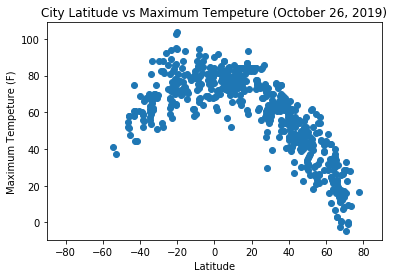

In [11]:
ddate = time.strftime("%B %d, %Y",) #set variable to current date

#create scatter plot comparing city latitude to high tempeture for current date
plt.scatter(df['Latitude'], df['Maximum Tempeture'])
plt.title(f'City Latitude vs Maximum Tempeture ({ddate})') #set title
plt.ylabel('Maximum Tempeture (F)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Maximum Tempeture']) - 5), max(df['Maximum Tempeture']) + 5)
plt.savefig(f'output/latvtemp_{ddate}.png')
plt.show()

# Latitude vs. Humidity Plot


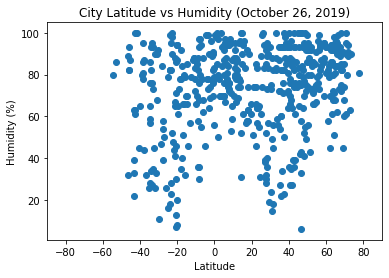

In [12]:
#create scatter plot comparing city latitude to humidity for current date
plt.scatter(df['Latitude'], df['Humidity'])
plt.title(f'City Latitude vs Humidity ({ddate})') #set title
plt.ylabel('Humidity (%)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Humidity']) - 5), max(df['Humidity']) + 5)
plt.savefig(f'output/latvhum_{ddate}.png')
plt.show()

# Latitude vs. Cloudiness Plot


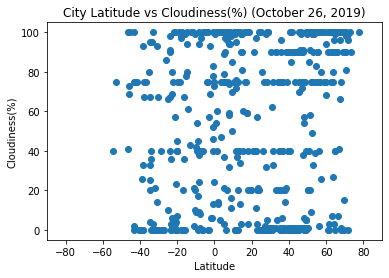

In [13]:
#create scatter plot comparing city latitude to the cloudiness of each city for current date
plt.scatter(df['Latitude'], df['Cloudiness(%)'])
plt.title(f'City Latitude vs Cloudiness(%) ({ddate})') #set title
plt.ylabel('Cloudiness(%)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Cloudiness(%)']) - 5), max(df['Cloudiness(%)']) + 5)
plt.savefig(f'output/latvcloud_{ddate}.png')
plt.show()

# Latitude vs. Wind Speed Plot

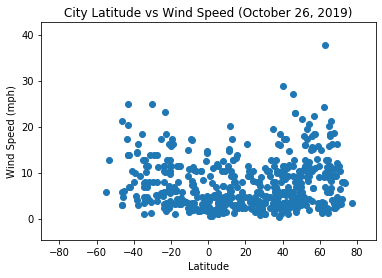

In [14]:
#create scatter plot comparing city latitude to the wind speed for current date
plt.scatter(df['Latitude'], df['Wind Speed'])
plt.title(f'City Latitude vs Wind Speed ({ddate})') #set title
plt.ylabel('Wind Speed (mph)') #set y axix 
plt.xlabel('Latitude') # set x axis
plt.xlim(lat_range) 
plt.ylim((min(df['Wind Speed']) - 5), max(df['Wind Speed']) + 5)
plt.savefig(f'output/latvcloud_{ddate}.png')
plt.show()